In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Hypothesis function

Outputs Y, Given X, by parameter &theta;

1. In Simple Definition:

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/hypothesis_equation.png?raw=1)

2. In Vector Form:

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/matrix_hypothesis.png?raw=1)

-   m -> number of elements in the dataset
-   X -> mx2 matrix
-   &theta; -> 2x1 matrix
-   m -> dataset size
-   Outputs mx2 matrix

Vector Form is implemented here for faster Operation




In [2]:
def hypothesis(x, theta):
    '''calculates the hypothesis function'''
    return np.matmul(x, theta)

## Cost Function

This essentially calculates the distance between what we need the line to be, and what it actually is:


1. Definition:
    -   m -> number of elements in the dataset
    -   x<sup>(i)</sup> -> value of x in i<sup>th</sup> data point
    -   y<sup>(i)</sup> -> value of y in i<sup>th</sup> data point

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/cost_function_equation.jpg?raw=1)

2. Vector Form for faster implementation
    -   m -> number of elements in the dataset
    -   h(&theta;, X) and Y -> mx1 matrix
    -   Outputs 1x1 matrix

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/cost_function_matrix.jpg?raw=1)

In [3]:
def compute_cost(x, y, theta):
    '''outputs the cost function'''
    m = len(y)
    error = hypothesis(x, theta) - y
    error_square_summed = np.matmul(np.transpose(error), error)
    return 1/(2*m)*error_square_summed

## Gradient Descent

Gradient Descent is an iterative way through which we can minimize the cost function J(&theta;,x), which essentially depends on the values of &theta;<sub>0</sub> and &theta;<sub>1</sub>

Gradient Descent is implemented as follows:

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/gradient_descent.jpg?raw=1)

where

1.  &alpha; -> a constant, also called learning rate of algorithm
2.  &theta;<sub>j</sub> -> j<sup>th</sup> value of &theta;
3.  J( &theta;<sub>0</sub> , &theta;<sub>1</sub> ) -> The Cost Function

This algorithm iteratively minimizes J(&theta; ,x) to reach it's minimum possible value

- Vector Implementation to speed up Algorithm: 
    -   m -> dataset size
    -   X -> mx2 matrix
    -   h(&theta;, X) and Y -> mx1 matrix

![](https://github.com/Abhiroop25902/ml-python/blob/main/Linear%20Regression/One%20Variable/Sources/gradient_descent_matrix.jpg?raw=1)




In [4]:
def gradient_descent(x, y, theta, alpha, num_iter):
    '''Performs Gradient Descent and outputs minimized theta and history of cost_functions'''
    m = len(y)
    J_history = np.zeros((num_iter, 1))

    for iter in range(num_iter):
        h = hypothesis(x, theta)
        error = h-y
        partial_derivative = 1/m * np.matmul(np.transpose(x), error)
        theta = theta - alpha*partial_derivative

        J_history[iter] = compute_cost(x, y, theta)

    return theta, J_history

# Predict 
 
 uses hypothesis() to predict value of new input

In [5]:
def predict(value, theta):
    x_array = [1, value]
    return hypothesis(x_array,theta)

# Processing
Loading Data from ex1data1.txt

In each line, first value is 'Population of City in 10,000s' and second value is 'Profit in $10,000s'

In [6]:
data_path = "./ex1data1.txt"
data = np.loadtxt(data_path, delimiter=',')

Extracting Poulation and Profits from data

In [7]:
# first value is independent variable x, second is dependant y
independent_x = data[:, 0]
dependant_y = data[:, 1]

Plotting the scatterplot of data

Plotting Data ...



Text(0.5, 0, 'Population of City in 10,000s')

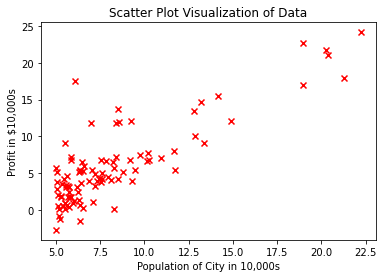

In [8]:
# showing data
print("Plotting Data ...\n")
plt.figure("Scatter Plot Visualization of Data")
plt.title("Scatter Plot Visualization of Data")
plt.scatter(independent_x, dependant_y, marker="x", c="r")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

converting x and y in matrix form

In [9]:
# as we are going to use matrix multiplication, we need x as first column 1, second column values
dataset_size = independent_x.shape[0]
ones = np.ones(dataset_size)
x = np.stack((ones, independent_x), axis=1)

# also converting y in vector form to matrix form
y = dependant_y.reshape(len(dependant_y), 1)

Testing hypothesis and cost function

In [10]:
# initializing theta
theta = np.zeros((2, 1))
alpha = 0.01
num_iter = 1500

print("Testing the cost function ...")
print(f"with theta = [[0],[0]] \nCost computed = {compute_cost(x,y,theta)}")
print("Expected cost value (approx) 32.07\n")

print(f"with theta = [[-1],[2]] \nCost computed = {compute_cost(x,y,[[-1],[2]])}")
print("Expected cost value (approx) 54.24\n")

Testing the cost function ...
with theta = [[0],[0]] 
Cost computed = [[32.07273388]]
Expected cost value (approx) 32.07

with theta = [[-1],[2]] 
Cost computed = [[54.24245508]]
Expected cost value (approx) 54.24



Running Gradient Descent

In [11]:
print("Running Gradient Descent ...\n")
minimized_theta, J_history = gradient_descent(x, y, theta, alpha, num_iter)

Running Gradient Descent ...



Plotting Value of J during Gradient Descent (This should Decrease with Epochs)

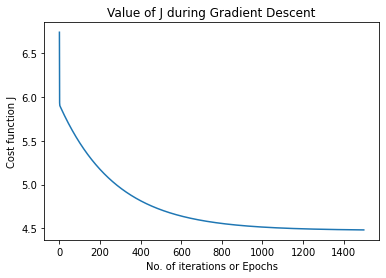

In [12]:
plt.figure("Value of J during Gradient Descent")
plt.title('Value of J during Gradient Descent')
x_axis = range(len(J_history))
plt.xlabel('No. of iterations or Epochs')
plt.ylabel("Cost function J")
plt.plot(x_axis,J_history)

Minimised Theta

In [13]:
print("Theta found by gradient descent:")
print(minimized_theta)
print("Expected theta values (approx)")
print("  3.6303\n  1.1664\n")

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
  3.6303
  1.1664



Predicting Value for New Input

In [14]:
print(f"For population = 35,000, we predict a profit of {predict(3.5, minimized_theta)*10000}")
print(f"For population = 70,000, we predict a profit of {predict(7, minimized_theta)*10000}")

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


Plotting Scatterplot and Hypothesis Line

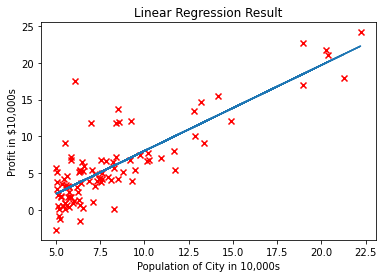